<a href="https://colab.research.google.com/github/hnhoangdz/SIT_AI/blob/main/LogisticRegression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/SIT_Project/heart.csv")
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
num_list= ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
for i in num_list:
  mean = df[i].mean()
  std = df[i].std()
  df[i] = (df[i]-mean)/std
Y = df['HeartDisease']
X = df.drop(columns=["HeartDisease"])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=123)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(type(X_train))

Mounted at /content/drive
(734, 20)
(734,)
(184, 20)
(184,)
<class 'pandas.core.frame.DataFrame'>


In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras.layers import LeakyReLU

"""
Set up the logistic regression model
"""
model = Sequential()
model.add(Dense(8, LeakyReLU(alpha=0.01),
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=X_train.shape[1]))
# model.add(Dense(4, LeakyReLU(alpha=0.01),
#                 kernel_regularizer=L1L2(l1=0.0, l2=0.1))) 
model.add(Dense(1, activation='sigmoid',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1)))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

model.test_on_batch(X_test, Y_test)
model.metrics_names

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 2.0418 - accuracy: 0.3038 - val_loss: 1.9488 - val_accuracy: 0.3261
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 1.8570 - accuracy: 0.3815 - val_loss: 1.7839 - val_accuracy: 0.4348
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 1.7125 - accuracy: 0.4809 - val_loss: 1.6520 - val_accuracy: 0.5489
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 1.5943 - accuracy: 0.5409 - val_loss: 1.5431 - val_accuracy: 0.5707
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 1.4954 - accuracy: 0.6158 - val_loss: 1.4510 - val_accuracy: 0.6033
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 1.4108 - accuracy: 0.6512 - val_loss: 1.3714 - val_accuracy: 0.6413
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 1.3367 - accuracy: 0.6580 - val_loss: 1.3012 - val_accuracy: 0.6304
Epoch 8/100


['loss', 'accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


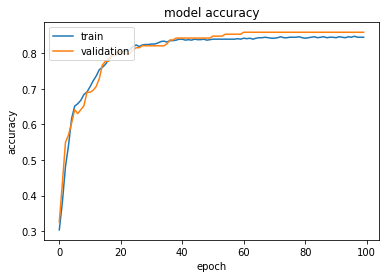

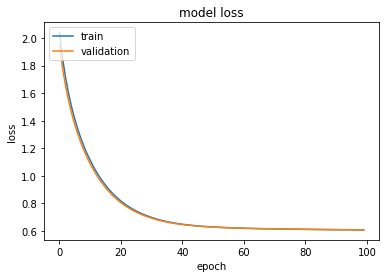

In [4]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()